transformada Hit-or-Miss 

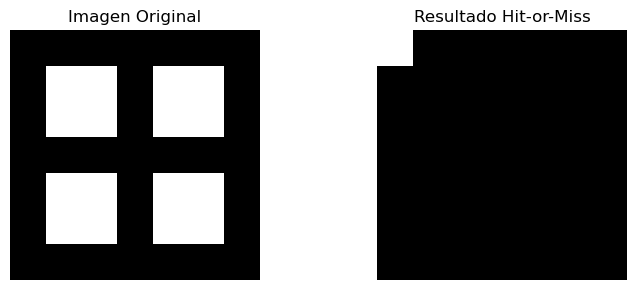

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

img = np.array([
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 1, 1, 0, 1, 1, 0],
    [0, 0, 0, 0, 0, 0, 0]
], dtype=np.uint8)

binary_img = img * 255

kernel_corner = np.array([
    [ 1,  1,  0],
    [ 1, -1,  0],
    [ 0,  0,  0]
], dtype=np.int8)

result = cv2.morphologyEx(binary_img, cv2.MORPH_HITMISS, kernel_corner)

plt.figure(figsize=(8, 3))

plt.subplot(1, 2, 1)
plt.title("Imagen Original")
plt.imshow(binary_img, cmap='gray')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.title("Hit-or-Miss")
plt.imshow(result, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()


Transformaciones geodésicas

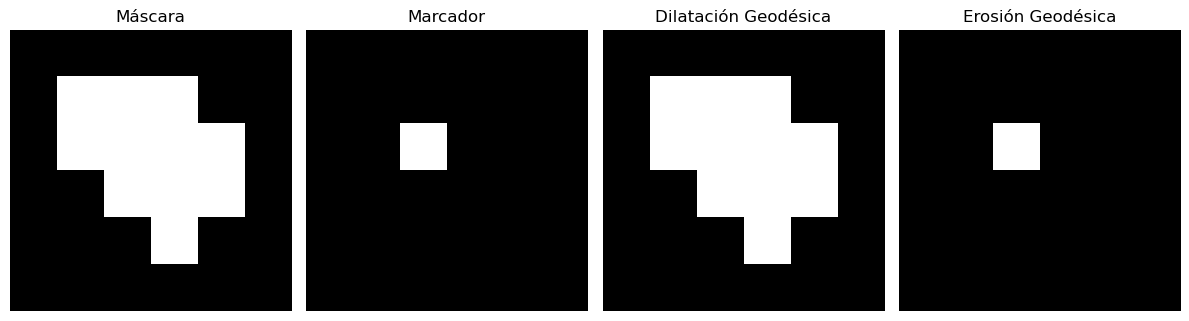

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask = np.array([
    [0, 0, 0, 0, 0, 0],
    [0, 255, 255, 255, 0, 0],
    [0, 255, 255, 255, 255, 0],
    [0, 0, 255, 255, 255, 0],
    [0, 0, 0, 255, 0, 0],
    [0, 0, 0, 0, 0, 0],
], dtype=np.uint8)

marker = np.zeros_like(mask, dtype=np.uint8)
marker[2, 2] = 255 

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

prev = np.zeros_like(marker)
dil_geo = marker.copy()

while True:
    dilated = cv2.dilate(dil_geo, kernel)
    dil_geo = np.minimum(dilated, mask)
    if np.array_equal(dil_geo, prev):
        break
    prev = dil_geo.copy()

prev = np.zeros_like(marker)
ero_geo = mask.copy()

while True:
    eroded = cv2.erode(ero_geo, kernel)
    ero_geo = np.maximum(eroded, marker)
    if np.array_equal(ero_geo, prev):
        break
    prev = ero_geo.copy()

fig, axs = plt.subplots(1, 4, figsize=(12, 4))
axs[0].set_title('Máscara')
axs[0].imshow(mask, cmap='gray')
axs[0].axis('off')

axs[1].set_title('Marcador')
axs[1].imshow(marker, cmap='gray')
axs[1].axis('off')

axs[2].set_title('Dilatación Geodésica')
axs[2].imshow(dil_geo, cmap='gray')
axs[2].axis('off')

axs[3].set_title('Erosión Geodésica')
axs[3].imshow(ero_geo, cmap='gray')
axs[3].axis('off')

plt.tight_layout()
plt.show()


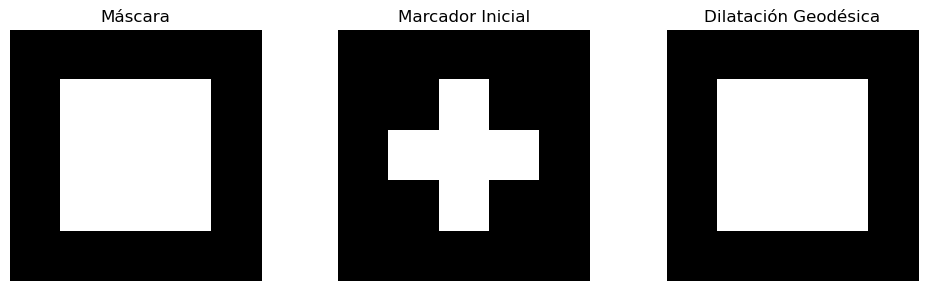

In [ ]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

mask = np.array([
    [0, 0,   0,   0, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 255, 255, 255, 0],
    [0, 0,   0,   0, 0]
], dtype=np.uint8)

marker = np.array([
    [0, 0,   0,   0, 0],
    [0, 0, 255,   0, 0],
    [0, 255, 255, 255, 0],
    [0, 0, 255,   0, 0],
    [0, 0,   0,   0, 0]
], dtype=np.uint8)

kernel = cv2.getStructuringElement(cv2.MORPH_CROSS, (3, 3))

prev = np.zeros_like(marker)
dil_geo = marker.copy()

while True:
    dilated = cv2.dilate(dil_geo, kernel)
    dil_geo = np.minimum(dilated, mask)
    if np.array_equal(dil_geo, prev):
        break
    prev = dil_geo.copy()

plt.figure(figsize=(10, 3))

plt.subplot(1, 3, 1)
plt.title('Máscara')
plt.imshow(mask, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 2)
plt.title('Marcador Inicial')
plt.imshow(marker, cmap='gray')
plt.axis('off')

plt.subplot(1, 3, 3)
plt.title('Dilatación Geodésica')
plt.imshow(dil_geo, cmap='gray')
plt.axis('off')

plt.tight_layout()
plt.show()
